# Homework 0

Review: Linear Algebra, Calculus, and Limits

-   Name: Ethan Wong 
-   CWL: ethnwng

> **Homework submission instructions**
>
> -   Due **Monday, January 12 at 7 PM.**
> -   See Homework Submission Instructions (located in About module) on Canvas
> -   You MAY NOT submit this assignment in a group

## Linear Algebra

Use these vectors and matrices to answer the questions below. Some of
the questions are meant to be answered by writing Julia code, and in
that case, show the commands you use. Others require you to write a
short answer.

In [1]:
using LinearAlgebra
b = [6, 2, 3]
s = [3, 4, 5]
A = [2 1 0; 1 -1 3; -1 0 1];

P1. rank of A

P2. Solve the equation $Ax=b$ using `A\b`.

P3. Solve the equation $Ax=b$ by factorizing $A$ as $A=LU$, then solving
$LUx=b$. Compute the factorization using `lu(A)`.

P4. Determine the set of points $\mathcal{L}$ that contains all scalings
(positive and negative) of the vector $b$.

P5. Compute the projection of the vector $s$ onto the set $\mathcal{L}$.

## Linear Algebra Answers
P1. rank(A) = 3

In [2]:
# P2
x = A \ b

3-element Vector{Float64}:
 -0.16666666666666652
  6.333333333333333
  2.8333333333333335

In [3]:
# P3
L, U, p = lu(A) # compute decomposition
Ux = L\(b[p])  # solve Ux = y
x2 = U\Ux # solve for x


3-element Vector{Float64}:
 -0.16666666666666652
  6.333333333333333
  2.8333333333333335

P4. The set of points that contain all scalings of $\mathbf{b}$ are for $(a,b,c) \in \mathcal{L}$
$$
\begin{pmatrix} a\\ b\\ c \end{pmatrix} = k \begin{pmatrix} 6 \\ 2 \\ 3 \end{pmatrix}
$$
for $k \in \mathbb{R}$ that is define
$$
\mathcal{L} := \{k \mathbf{b} : k \in \mathbb{R}\}
$$

In [4]:
proj_s_L = (dot(s,b ))/dot(b,b) * b

3-element Vector{Float64}:
 5.020408163265307
 1.6734693877551021
 2.5102040816326534

## Calculus

P6. (Derivatives) Compute the first and second derivatives of these
functions. We normally use the natural log, unless specified otherwise.

1.  $f(x) = x^2 + 2x + 1$ (and report the minimizer)
2.  $f(x) = \sin(x) + \cos(x)$
3.  $f(x) = \exp(x) + \log(x)$
4.  $f(x) = \sum_{i=1}^m \log(1+\exp(-a_i x))$

P7. (Gradients) Compute the gradient function $\nabla f(x)$ for these
functions. Here, the $a$ is an $n$-vector, $H$ is an $n$-by-$n$
symmetric matrix, and $A$ is an $m$-by-$n$ matrix (square or
rectangular).

1.  $f(x) = \langle a, x\rangle + \beta$
2.  $f(x) = \langle x, Hx\rangle \equiv x^T H x$
3.  $f(x) = \tfrac12\|Ax-b\|^2$
4.  $f(x) = \log\sum_{i=1}^m \exp(\langle a_i, x\rangle)$

**Inner-product notation**
The inner product between two vectors $x$ and $y$ of the same length
is denoted $\langle x, y\rangle=x^T y = \sum_i x_i y_i$. The inner
product is a scalar. The inner product is also called the dot product
because it is often denoted $x\cdot y$.

**Quadratic forms: symmetry without loss of generality**
In the quadratic form $f(x) = \langle x, Hx\rangle$, we may assume
that the matrix $H$ is symmetric, i.e., $H^T = H$ because otherwise we
could replace $H$ with $\tfrac12(H+H^T)$ because
$\langle x, Hx\rangle = \langle x, \tfrac12(H+H^T)x\rangle$.

P8. Let $f(x)=\sum_{j=1}^{2}\sin(\cos(x_j))$. Use automatic
differentiation (AD) to compute the gradient $\nabla f(x)$ at the point
$x=(0,\pi/2)$. Use the `ReverseDiff.jl` package. You can install it with
`Pkg.add("ReverseDiff")`. You can read the
[documentation](https://juliadiff.org/ReverseDiff.jl/).

## Calculus Answers
P6. 
1. $f'(x) = 2x + 2$, $f''(x) = 2$
 
   minimizer: $f'(x) = 2x + 2 = 0 \implies x = -1$ since $f''(x) > 0$ then $x=-1$ is a global minimum.

2. $f'(x) = \cos(x) - \sin(x)$, $f''(x) = -\sin(x) - \cos(x)$ 

3. $f'(x) = exp(x) + 1/x$, $f''(x) = exp(x) + 1/x^2$

4. $f'(x) = \sum_{i=1}^m \frac{-a_i}{e^{a_i x} +1}$, $f''(x) = \sum_{i=1}^m \frac{a_i^2 e^{a_i x}}{(1+e^{a_ix})^2}$

P7.
1. $\boxed{f'(x) = \mathbf{a}}$
2. $f'(x) = d/dx(x^T H x)$ since $H$ is symmetric then $\boxed{f'(x) = (H+H^T)x = 2Hx}$ 
3. From lecture, $\boxed{f'(x) = A^T(Ax-b)}$ 
4. $f'(x) = \frac{d}{dx}log(u) \frac{du}{dx}$, for $u=\sum_{i=1}^m exp(<a_i, x>)$

   $f'(x) = \frac{1}{\sum_{i=1}^m exp(<a_i,x>)} \frac{d}{dx} (\sum_{i=1}^m exp(<a_i, x>))$

   $\frac{d}{dx} (\sum_{i=1}^m exp(<a_i, x>)) = \sum_{i=1}^m exp(<a_i,x>)a_i$

   $\boxed{f'(x) = \frac{\sum_{i=1}^m exp(<a_i,x>)a_i}{\sum_{i=1}^m exp(<a_i, x>)}}$




In [5]:
# P8
using ReverseDiff

f(x) = sum(sin.(cos.(x)))
points = [0, pi/2]

ReverseDiff.gradient(f, points)

2-element Vector{Float64}:
  0.0
 -1.0

## Sequences and rates of convergence

The *rate of convergence* measures tells us how fast a sequence
converges to its limit (if one exists).

A sequence $\{x_k\}$ converging to $x^*$ is said to converge *linearly* with rate $\mu$ if

$$
\lim_{k\to\infty} \frac{|x_{k+1}-x^*|}{|x_k-x^*|}=\mu\in(0,1).
$$ 

The sequence is said to converge *superlinearly* if

$$
\lim_{k\to\infty} \frac{|x_{k+1}-x^*|}{|x_k-x^*|}=0.
$$ 

The sequence is said to converge *quadratically* with rate $\mu$ if

$$
\lim_{k\to\infty} \frac{|x_{k+1}-x^*|}{|x_k-x^*|^2}=\mu\in(0,\infty).
$$

Note that a sequence that converges quadratically also converges
superlinearly, and a sequence that converges superlinearly also
converges linearly. The converse implications do not hold.

For much more on the speed of sequence convergence, see [How Many Steps
Still Left to $x^*$](https://doi.org/10.1137/19M1244858) (Cătinaş 2021)
and [Wikipedia](https://en.wikipedia.org/wiki/Rate_of_convergence).

P9. Derive the convergence order for
each of the sequences $\{1/2^k\}$, $\{2^{-2^k}\},$ and $\{3^{-k^2}\}.$

P10. Provide two separate plots of the values of the first 50 elements
of these sequences: the first plots the sequence value vs $k$; the
second plots the log of the sequence value vs $k$. The latter plot is
called a log-linear, or semi-log, plot.
<span class="column-margin margin-aside">Use the `Plots.jl` package. You
can install it with `Pkg.add("Plots")`. This
[tutorial](https://docs.juliaplots.org/latest/tutorial/) may be
helpful.</span> **Note:** you may encounter some errors with your semi-log plot if some of your sequence values are numerically zero. Feel free to only plot as many values as you can before encountering zeros.

Cătinaş, Emil. 2021. “How Many Steps Still Left to \$x\$\*?” *SIAM
Review* 63 (3): 585–624. <https://doi.org/10.1137/19M1244858>.

P9. 
For each let $x^* =0$ 
1. 
$$
\lim_{k\to\infty} \frac{|1/2^{k+1}-0|}{|1/2^k-0|^2} = 0.5 \frac{1/2^k}{1/2^k} = 0.5
$$
since $0.5 \in (0,1)$ the sequence converges linearly at rate $\mu=0.5$

2.
$$
\lim_{k\to\infty} \frac{2^{-2^{k+1}}}{(2^{-2^k})^2} = \lim_{k\to\infty} 1 = 1
$$
since $1 \in (0,\infty)$ the sequence converges quadratically with rate $\mu=1$

3. 
$$
\lim_{k\to\infty} \frac{3^{-(k+1)^2}}{(3^{-k^2})} = \lim_{k\to\infty} 3^{-(2k+1)} = 0
$$
we get that the sequence is superlinear, Now to check for quadratic
$$
\lim_{k\to\infty} \frac{3^{-(k+1)^2}}{(3^{-k^2})^2} = \lim_{k\to\infty} 3^{k^2-2k-1} = \infty
$$
since the limit converges to $\infty$ then the sequence converges quadratically.

┌ Warning: Skipped marker arg triangle.
└ @ Plots /Users/ethanwong/.julia/packages/Plots/xC48f/src/args.jl:1155
┌ Warning: Skipped marker arg triangle.
└ @ Plots /Users/ethanwong/.julia/packages/Plots/xC48f/src/args.jl:1155


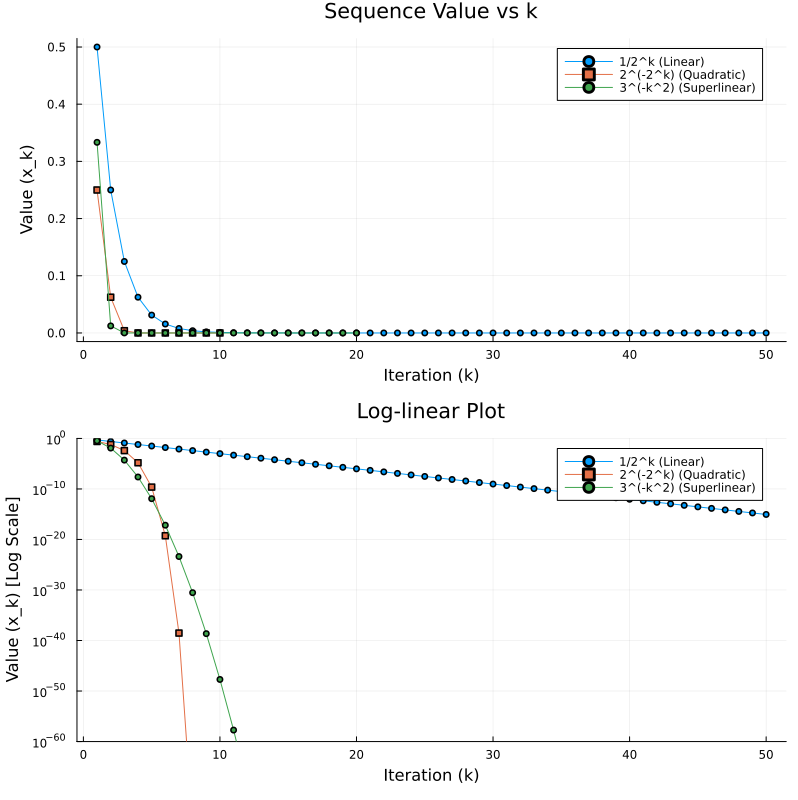

In [ ]:
using Plots

k_linear = 1:50      
k_super  = 1:20      
k_quad   = 1:10      

s1 = [1/2.0^k for k in k_linear]
s2 = [2.0^(-(2.0^k)) for k in k_quad]
s3 = [3.0^(-(k^2)) for k in k_super]

p1 = plot(k_linear, s1, label="1/2^k (Linear)", marker=:circle, markersize=3)
plot!(p1, k_quad, s2, label="2^(-2^k) (Quadratic)", marker=:square, markersize=3)
plot!(p1, k_super, s3, label="3^(-k^2) (Superlinear)", marker=:triangle, markersize=3)
xlabel!(p1, "Iteration (k)")
ylabel!(p1, "Value (x_k)")
title!(p1, "Sequence Value vs k")

p2 = plot(k_linear, s1, yscale=:log10, label="1/2^k (Linear)", marker=:circle, markersize=3)
plot!(p2, k_quad, s2, yscale=:log10, label="2^(-2^k) (Quadratic)", marker=:square, markersize=3)
plot!(p2, k_super, s3, yscale=:log10, label="3^(-k^2) (Superlinear)", marker=:triangle, markersize=3)

ylims!(p2, (1e-60, 1)) 
xlabel!(p2, "Iteration (k)")
ylabel!(p2, "Value (x_k) [Log Scale]")
title!(p2, "Log-linear Plot")

# Arrange the two plots in a layout
plot(p1, p2, layout=(2,1), size=(800, 800))